# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [56]:
df_grafico = df[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]
df_grafico.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0


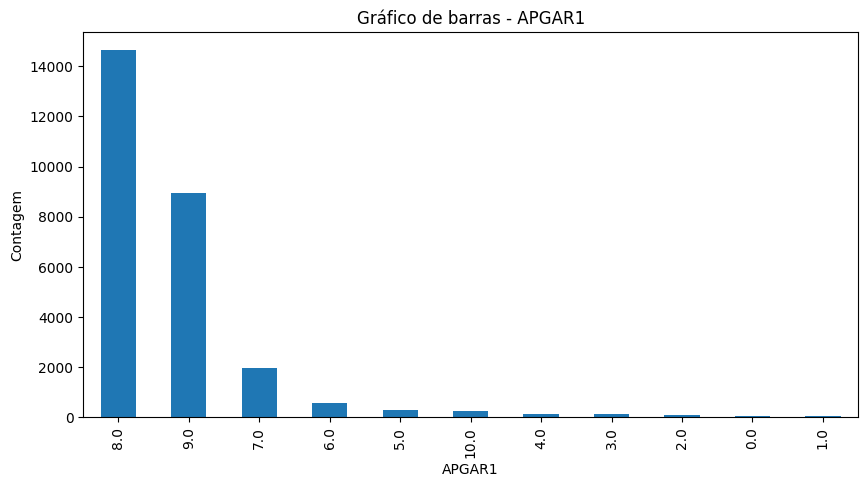

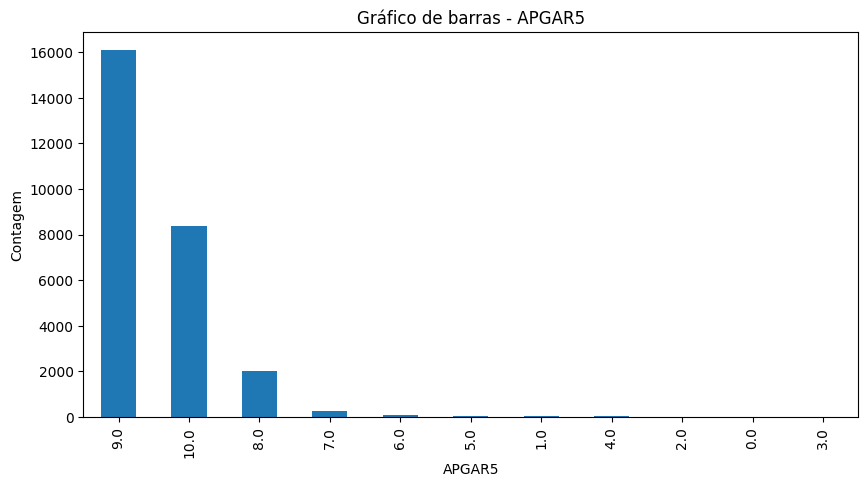

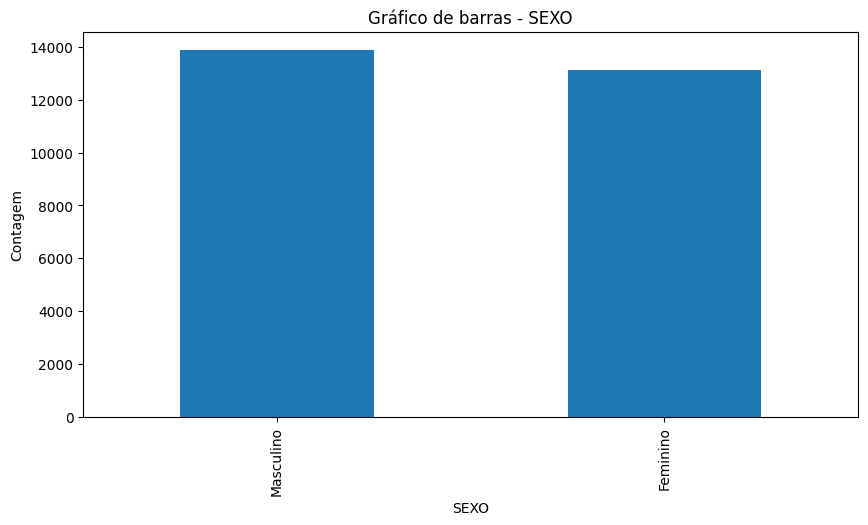

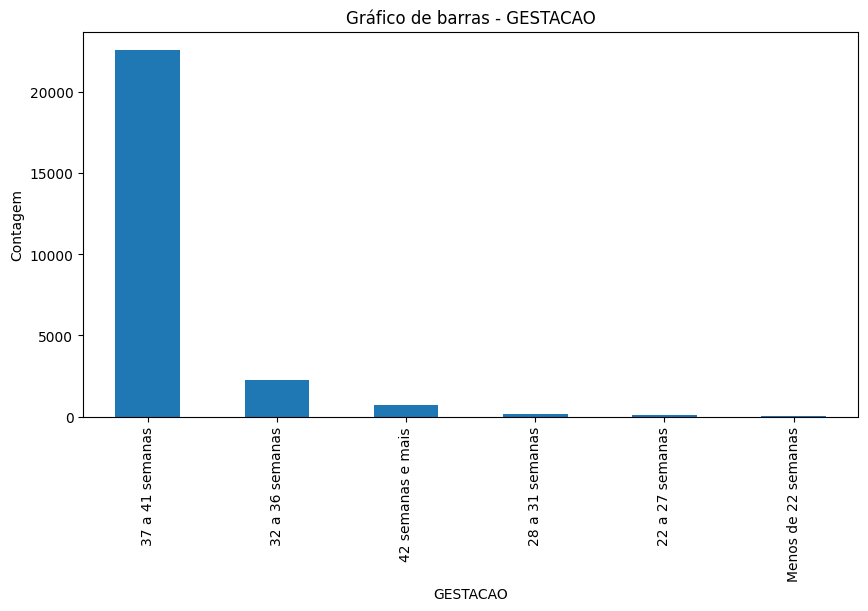

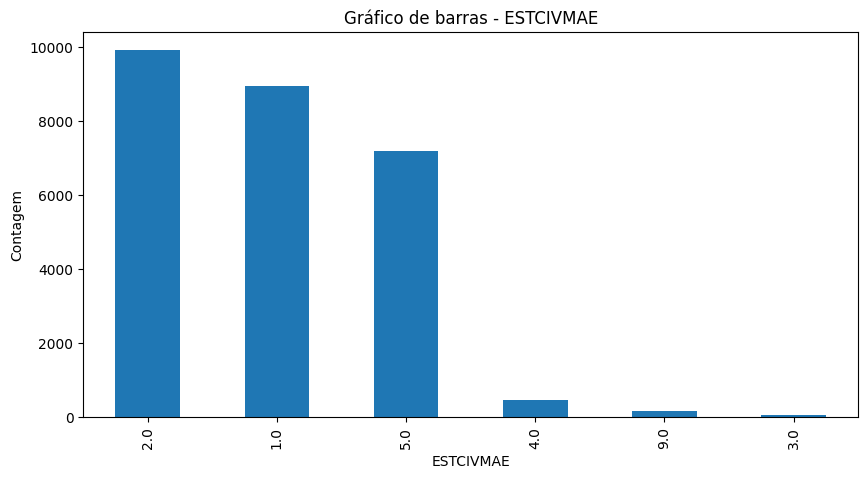

In [57]:
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

for var in variaveis:
    plt.figure(figsize=(10,5))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Gráfico de barras - {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [58]:
df_grafico = df[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
df_grafico.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4


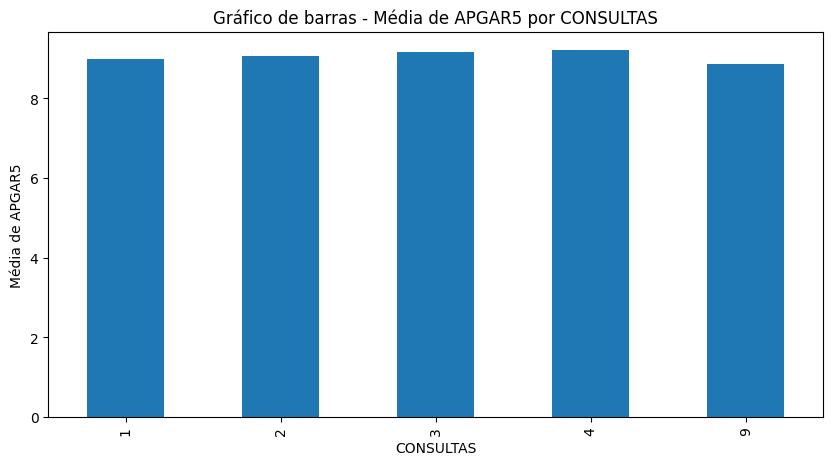

In [59]:
avg_APGAR5 = df.groupby('CONSULTAS')['APGAR5'].mean()

# Criação do gráfico
plt.figure(figsize=(10,5))
avg_APGAR5.plot(kind='bar')
plt.title('Gráfico de barras - Média de APGAR5 por CONSULTAS')
plt.xlabel('CONSULTAS')
plt.ylabel('Média de APGAR5')
plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

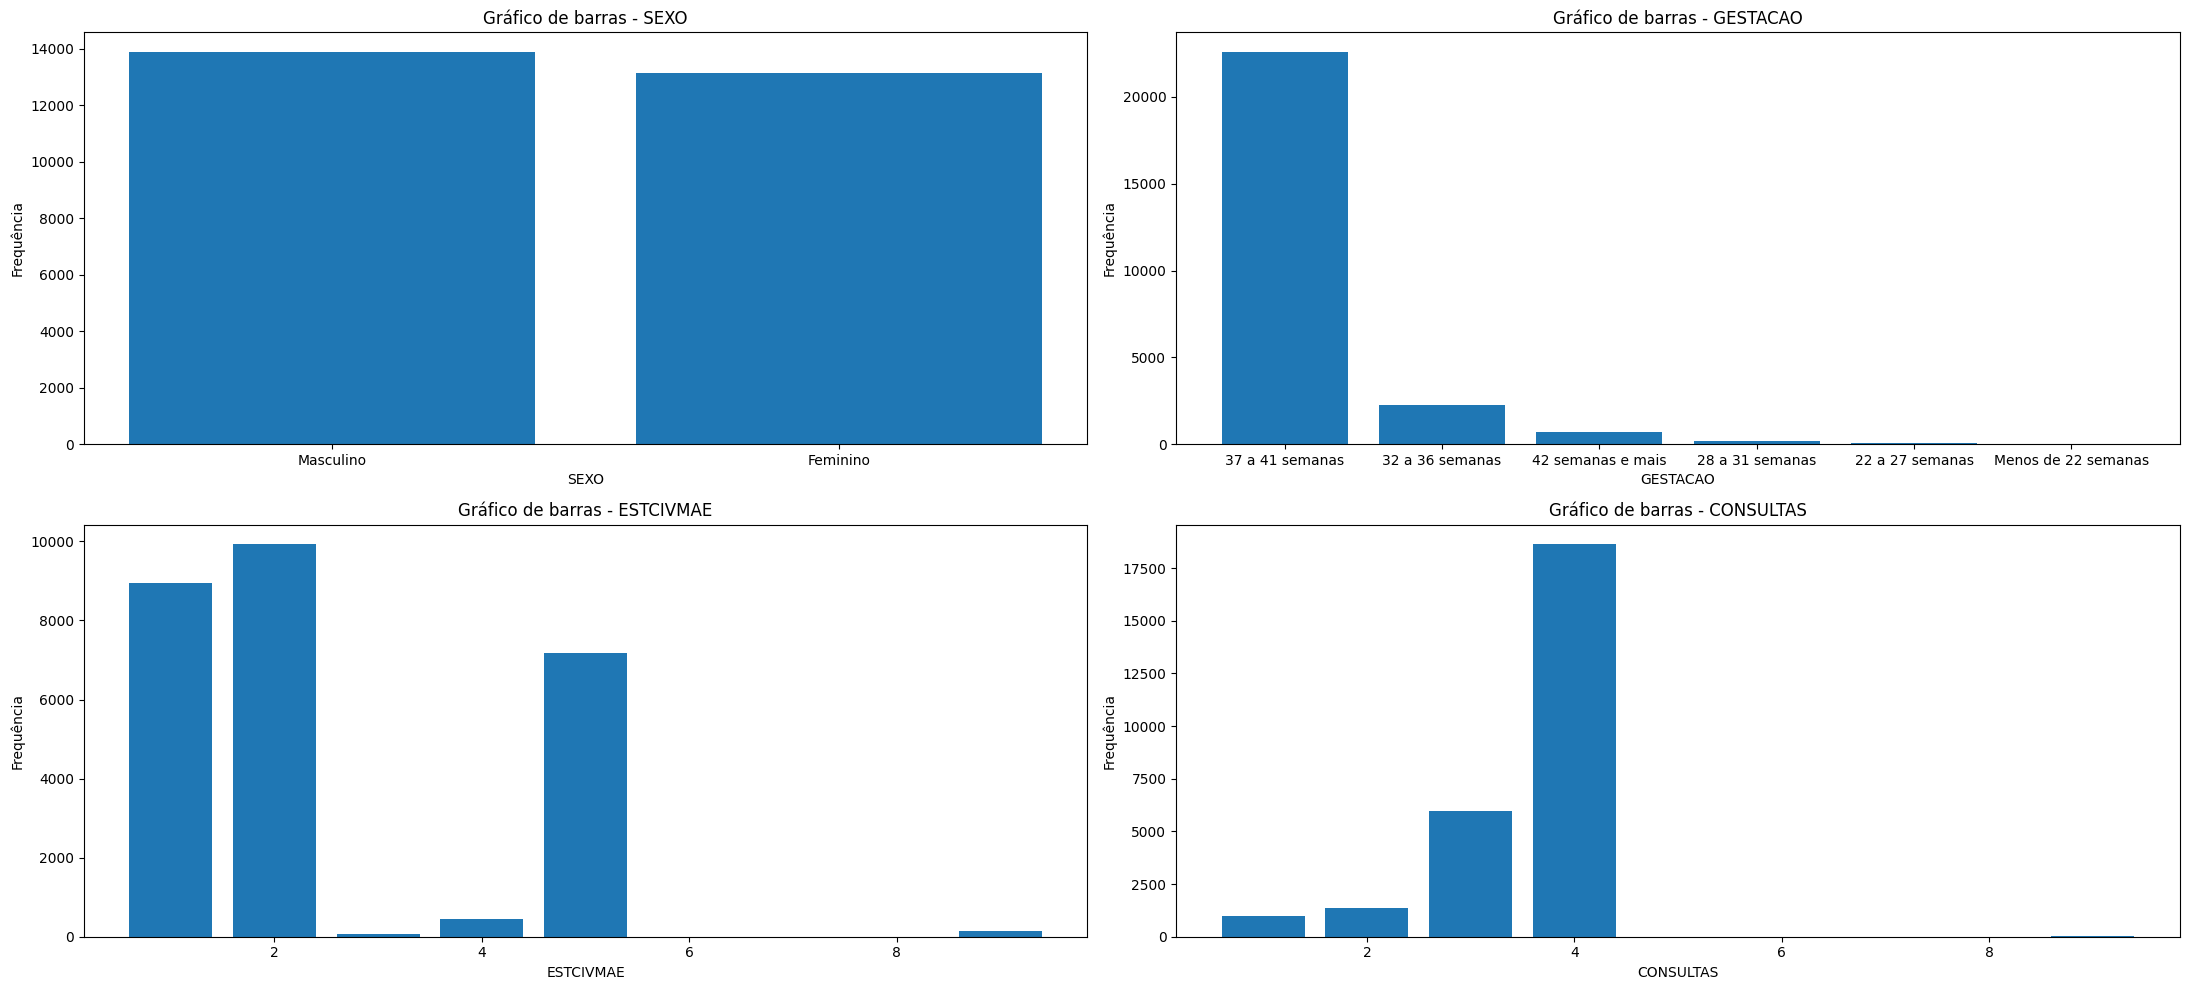

In [60]:
variaveis = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

# Criação dos gráficos
fig, axs = plt.subplots(2, 2, figsize=(22,10))

for i, var in enumerate(variaveis):
    linha = i // 2
    coluna = i % 2
    axs[linha, coluna].bar(df[var].value_counts().index, df[var].value_counts().values)
    axs[linha, coluna].set_title(f'Gráfico de barras - {var}')
    axs[linha, coluna].set_xlabel(var)
    axs[linha, coluna].set_ylabel('Frequência')

plt.tight_layout()
plt.show()
